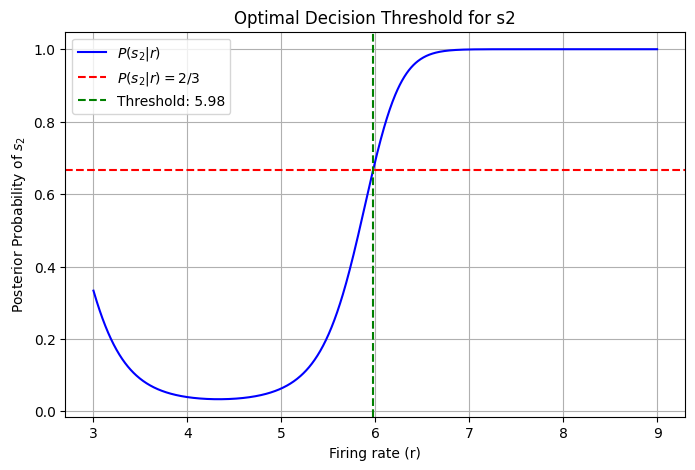

5.978978978978979

In [ ]:
######
# Week 2 - Neural Decoding
# Callyn Villanueva
#
#####

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Mean and standard deviation for s1 & s2
mu_s1, sigma_s1 = 5, 0.5
mu_s2, sigma_s2 = 7, 1


# Prior probabilities
P_s1 = P_s2 = 0.5

def likelihood_s1(r):
    return stats.norm.pdf(r, mu_s1, sigma_s1)

def likelihood_s2(r):
    return stats.norm.pdf(r, mu_s2, sigma_s2)

# Compute posterior probabilities using Bayes' Rule
def posterior_s2(r):
    P_r_s1 = likelihood_s1(r) * P_s1
    P_r_s2 = likelihood_s2(r) * P_s2
    return P_r_s2 / (P_r_s1 + P_r_s2)

# Find the decision threshold where P(s2|r) > 2/3
r_values = np.linspace(3, 9, 1000)  # Range of possible r values
posterior_s2_values = np.array([posterior_s2(r) for r in r_values])

# Find the threshold where posterior probability of s2 first exceeds 2/3
threshold_index = np.where(posterior_s2_values > 2/3)[0][0]
decision_threshold = r_values[threshold_index]

plt.figure(figsize=(8,5))
plt.plot(r_values, posterior_s2_values, label=r'$P(s_2 | r)$', color='blue')
plt.axhline(y=2/3, color='red', linestyle='dashed', label=r'$P(s_2 | r) = 2/3$')
plt.axvline(x=decision_threshold, color='green', linestyle='dashed', label=f'Threshold: {decision_threshold:.2f}')
plt.xlabel('Firing rate (r)')
plt.ylabel('Posterior Probability of $s_2$')
plt.title('Optimal Decision Threshold for s2')
plt.legend()
plt.grid()
plt.show()

# Return the computed threshold
decision_threshold


The Maximum Likelihood (ML) criterion chooses the hypothesis that maximizes the likelihood function, which is P(test∣condition)P(test∣condition). In this case, we compare:

    P(positive test∣has disease)=0.99P(positive test∣has disease)=0.99
    P(positive test∣no disease)=0.02P(positive test∣no disease)=0.02